 # Tarefa

1. Teste outras métricas para o [kNN](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics) nos dados SMS Spam Collection Data Set. Qual métrica obteve a melhor acurácia? Compare o desempenho do kNN ao Naive Bayes nesse problema utilizando a medida f1, precisão e revocação.

    - Observação:
        - Divida o conjunto de dados SMS Spam Collection em 3 subconjuntos disjuntos (estratificada): Treinamento (70%), Validação (15%) e Teste (15%).
        - Treine o modelo com o conjunto de Treinamento (70%).
        - Selecione a melhor métrica de acordo com o desempenho do modelo no conjunto de Validação (15%).
        - Treine o melhor modelo no conjunto Treinamento (70%) + Validação (15%).
        - Reporte a performance obtida no conjunto de Teste (15%) a medida f1, precisão e revocação.

2. Carregue o conjunto de dados Optical Recognition of Handwritten Digits (ORHD) do UCI Machine Learning
[link](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits)

- lembre-se de instalar a biblioteca:

    `!pip install ucimlrepo`

- Para carregar a base de dados utilize:

    ```python
    ORHD = fetch_ucirepo(id=80)
    ```

- Pré-processe os dados:

    ```python
    features = ORHD.data.features.to_numpy().astype(np.float32) / 16.  # normaliza para o intervalo [0, 1]
    targets  = ORHD.data.targets.to_numpy().astype(np.int64)
    ```

- Transforme os dados (características/features/atributos de entrada) em valores binários:

    - feature >= 0.5 deverá ser mapeado para 1

    - feature < 0.5 deverá ser mapeado para 0

- Divida o conjunto de dados Optical Recognition of Handwritten Digits (ORHD) em 3 subconjuntos disjuntos: Treinamento (70%), Validação (15%) e Teste (15%).

- Treine um modelo Naive Bayes (Bernoulli) com o conjunto Treinamento (70%) + Validação (15%).

- Calcule as acurácias (conjunto de Teste (15%)) e a matriz de confusão.

- Treine um modelo k-NN nos mesmos dados Optical Recognition of Handwritten Digits (ORHD) binarizados e compare os resultados com o Naive Bayes.

    - Observação:
        - Treine o k-NN com o conjunto de Treinamento (70%).
        - Selecione a melhor métrica e melhor número de vizinhos de acordo com o desempenho do modelo no conjunto de Validação (15%).
        - Treine o melhor modelo no conjunto Treinamento (70%) + Validação (15%).
        - Reporte a performance obtida no conjunto de Teste (15%).

**Entregáveis**:

1. Código (notebook `*.ipynb`).

2. Relatório `*.pdf` (compile seus resultados e inclua as figuras).

In [8]:
# IMPORTAÇÃO DAS BIBLIOTECAS
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
!pip install ucimlrepo -q
from ucimlrepo import fetch_ucirepo


In [9]:
# PRÉ-PROCESSAMENTO DOS DADOS DE SPAM
url_spam = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df_spam = pd.read_csv(url_spam, sep='\t', header=None, names=['label', 'message'])
df_spam['label'] = df_spam['label'].map({'ham': 0, 'spam': 1})
X_spam = df_spam['message']
y_spam = df_spam['label']


In [10]:
# DIVISÃO DO DATASET DE SPAM
print("\n[ETAPA 1.2] Dividindo o dataset de SPAM em Treino, Validação e Teste...")

X_train_spam_temp, X_temp_spam, y_train_spam, y_temp_spam = train_test_split(
    X_spam, y_spam, test_size=0.30, random_state=42, stratify=y_spam
)
X_val_spam, X_test_spam, y_val_spam, y_test_spam = train_test_split(
    X_temp_spam, y_temp_spam, test_size=0.50, random_state=42, stratify=y_temp_spam
)

print(f"Tamanho do conjunto de Treinamento: {len(X_train_spam_temp)} amostras")
print(f"Tamanho do conjunto de Validação: {len(X_val_spam)} amostras")
print(f"Tamanho do conjunto de Teste: {len(X_test_spam)} amostras")



[ETAPA 1.2] Dividindo o dataset de SPAM em Treino, Validação e Teste...
Tamanho do conjunto de Treinamento: 3900 amostras
Tamanho do conjunto de Validação: 836 amostras
Tamanho do conjunto de Teste: 836 amostras


In [11]:
# VETORIZAÇÃO DOS DADOS DE TEXTO
print("\n[ETAPA 1.3] Transformando texto em vetores numéricos (CountVectorizer)...")

vectorizer = CountVectorizer(binary=True)
X_train_vec_spam = vectorizer.fit_transform(X_train_spam_temp).toarray()
X_val_vec_spam = vectorizer.transform(X_val_spam).toarray()
print("Vetorização concluída!")


[ETAPA 1.3] Transformando texto em vetores numéricos (CountVectorizer)...
Vetorização concluída!


In [12]:
# SELECIONE A MELHOR MÉTRICA (CONJUNTO DE VALIDAÇÃO)
print("\n[ETAPA 1.4] Selecionando a melhor métrica para o k-NN no conjunto de Validação...")

metrics_to_test = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
knn_accuracies = {}

for metric in tqdm(metrics_to_test, desc="Testando métricas do k-NN"):
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train_vec_spam, y_train_spam)
    y_pred_val = knn.predict(X_val_vec_spam)
    accuracy = accuracy_score(y_val_spam, y_pred_val)
    knn_accuracies[metric] = accuracy
    print(f"Acurácia com a métrica '{metric}': {accuracy:.4f}")


[ETAPA 1.4] Selecionando a melhor métrica para o k-NN no conjunto de Validação...


Testando métricas do k-NN:   0%|          | 0/4 [00:00<?, ?it/s]

Acurácia com a métrica 'euclidean': 0.9151
Acurácia com a métrica 'manhattan': 0.9151
Acurácia com a métrica 'chebyshev': 0.8660
Acurácia com a métrica 'minkowski': 0.9151


In [13]:
# REINE O MELHOR MODELO (TREINO + VALIDAÇÃO)
print("\n[ETAPA 1.5] Treinando os modelos finais com Treino + Validação...")

X_final_train_spam = pd.concat([X_train_spam_temp, X_val_spam])
y_final_train_spam = pd.concat([y_train_spam, y_val_spam])

vectorizer_final = CountVectorizer(binary=True)
X_final_train_vec_spam = vectorizer_final.fit_transform(X_final_train_spam).toarray()
X_test_vec_spam_final = vectorizer_final.transform(X_test_spam).toarray()

knn_final = KNeighborsClassifier(n_neighbors=5, metric=best_metric_spam)
knn_final.fit(X_final_train_vec_spam, y_final_train_spam)
print(f"Modelo k-NN (métrica='{best_metric_spam}') treinado com sucesso!")

nb_final = BernoulliNB()
nb_final.fit(X_final_train_vec_spam, y_final_train_spam)
print("Modelo Naive Bayes treinado com sucesso!")


[ETAPA 1.5] Treinando os modelos finais com Treino + Validação...
Modelo k-NN (métrica='euclidean') treinado com sucesso!
Modelo Naive Bayes treinado com sucesso!


In [15]:

# REPORTE A PERFORMANCE (CONJUNTO DE TESTE) ---
print("\n[ETAPA 1.6] Comparando a performance dos modelos no conjunto de Teste...")

y_pred_knn_spam = knn_final.predict(X_test_vec_spam_final)
y_pred_nb_spam = nb_final.predict(X_test_vec_spam_final)

print("\n--- RELATÓRIO DE CLASSIFICAÇÃO - K-NN (Melhor Métrica) ---")
print(classification_report(y_test_spam, y_pred_knn_spam, target_names=['Ham', 'Spam']))

print("\n--- RELATÓRIO DE CLASSIFICAÇÃO - NAIVE BAYES ---")
print(classification_report(y_test_spam, y_pred_nb_spam, target_names=['Ham', 'Spam']))




[ETAPA 1.6] Comparando a performance dos modelos no conjunto de Teste...

--- RELATÓRIO DE CLASSIFICAÇÃO - K-NN (Melhor Métrica) ---
              precision    recall  f1-score   support

         Ham       0.92      1.00      0.96       724
        Spam       1.00      0.46      0.63       112

    accuracy                           0.93       836
   macro avg       0.96      0.73      0.79       836
weighted avg       0.93      0.93      0.91       836


--- RELATÓRIO DE CLASSIFICAÇÃO - NAIVE BAYES ---
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       724
        Spam       1.00      0.89      0.94       112

    accuracy                           0.99       836
   macro avg       0.99      0.95      0.97       836
weighted avg       0.99      0.99      0.99       836



In [16]:
# CARREGAMENTO E PRÉ-PROCESSAMENTO DO DATASET ORHD ---
print("\n[ETAPA 2.1] Carregando e pré-processando o dataset ORHD...")

ORHD = fetch_ucirepo(id=80)
features = ORHD.data.features.to_numpy().astype(np.float32) / 16.
targets = ORHD.data.targets.to_numpy().ravel().astype(np.int64)
features_bin = np.where(features >= 0.5, 1, 0)
print("Dataset carregado e binarizado!")



[ETAPA 2.1] Carregando e pré-processando o dataset ORHD...
Dataset carregado e binarizado!


In [17]:
# DIVISÃO DO DATASET ORHD (70/15/15) ---
print("\n[ETAPA 2.2] Dividindo o dataset ORHD em Treino, Validação e Teste...")

X_train_dig_temp, X_temp_dig, y_train_dig_temp, y_temp_dig = train_test_split(
    features_bin, targets, test_size=0.30, random_state=42, stratify=targets
)
X_val_dig, X_test_dig, y_val_dig, y_test_dig = train_test_split(
    X_temp_dig, y_temp_dig, test_size=0.50, random_state=42, stratify=y_temp_dig
)

print(f"Tamanho do conjunto de Treinamento: {len(X_train_dig_temp)} amostras")
print(f"Tamanho do conjunto de Validação: {len(X_val_dig)} amostras")
print(f"Tamanho do conjunto de Teste: {len(X_test_dig)} amostras")


[ETAPA 2.2] Dividindo o dataset ORHD em Treino, Validação e Teste...
Tamanho do conjunto de Treinamento: 3934 amostras
Tamanho do conjunto de Validação: 843 amostras
Tamanho do conjunto de Teste: 843 amostras



[ETAPA 2.3] Treinando e avaliando o modelo Naive Bayes...
Modelo Naive Bayes treinado.

Acurácia do Naive Bayes no conjunto de Teste: 0.8968
Gerando Matriz de Confusão para o Naive Bayes...


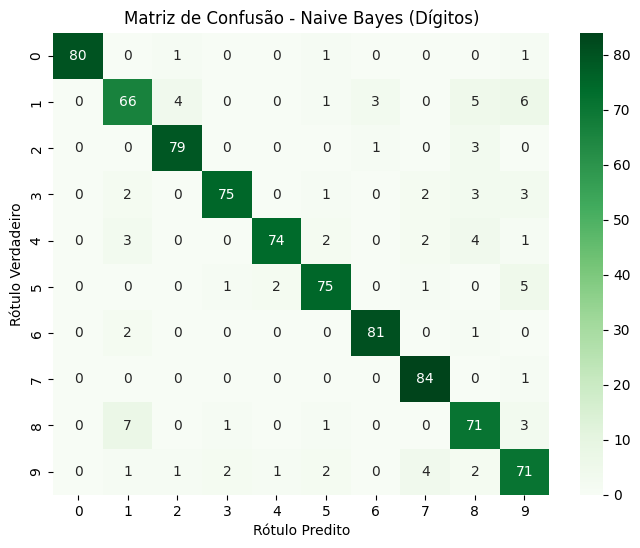

In [18]:

# TREINAMENTO E AVALIAÇÃO DO NAIVE BAYES ---
print("\n[ETAPA 2.3] Treinando e avaliando o modelo Naive Bayes...")

X_final_train_dig_nb = np.concatenate((X_train_dig_temp, X_val_dig))
y_final_train_dig_nb = np.concatenate((y_train_dig_temp, y_val_dig))

nb_digits = BernoulliNB()
nb_digits.fit(X_final_train_dig_nb, y_final_train_dig_nb)
print("Modelo Naive Bayes treinado.")

y_pred_nb_dig = nb_digits.predict(X_test_dig)
accuracy_nb_dig = accuracy_score(y_test_dig, y_pred_nb_dig)
print(f"\nAcurácia do Naive Bayes no conjunto de Teste: {accuracy_nb_dig:.4f}")

print("Gerando Matriz de Confusão para o Naive Bayes...")
cm_nb_dig = confusion_matrix(y_test_dig, y_pred_nb_dig)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_dig, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão - Naive Bayes (Dígitos)')
plt.xlabel('Rótulo Predito')
plt.ylabel('Rótulo Verdadeiro')
plt.show()

In [19]:

# SELECIONE OS MELHORES HIPERPARÂMETROS PARA O K-NN ---
print("\n[ETAPA 2.4] Buscando melhores hiperparâmetros para o k-NN (Dígitos)...")

k_values_dig = [1, 3, 5, 7]
metrics_dig = ['euclidean', 'manhattan', 'chebyshev']
best_knn_params_dig = {'k': 0, 'metric': '', 'accuracy': 0.0}

for k in tqdm(k_values_dig, desc="Testando 'k'"):
    for metric in metrics_dig:
        knn_dig = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_dig.fit(X_train_dig_temp, y_train_dig_temp)
        y_pred_val_dig = knn_dig.predict(X_val_dig)
        accuracy_val = accuracy_score(y_val_dig, y_pred_val_dig)

        if accuracy_val > best_knn_params_dig['accuracy']:
            best_knn_params_dig['accuracy'] = accuracy_val
            best_knn_params_dig['k'] = k
            best_knn_params_dig['metric'] = metric

print(f"\nMelhores parâmetros para k-NN encontrados na validação:")
print(f"  - Número de Vizinhos (k): {best_knn_params_dig['k']}")
print(f"  - Métrica de Distância: '{best_knn_params_dig['metric']}'")
print(f"  - Acurácia de Validação: {best_knn_params_dig['accuracy']:.4f}")


[ETAPA 2.4] Buscando melhores hiperparâmetros para o k-NN (Dígitos)...


Testando 'k':   0%|          | 0/4 [00:00<?, ?it/s]


Melhores parâmetros para k-NN encontrados na validação:
  - Número de Vizinhos (k): 5
  - Métrica de Distância: 'euclidean'
  - Acurácia de Validação: 0.9573



[ETAPA 2.5] Treinando e avaliando o modelo k-NN final...
Modelo k-NN final treinado.

Acurácia do k-NN no conjunto de Teste: 0.9609
Gerando Matriz de Confusão para o k-NN...


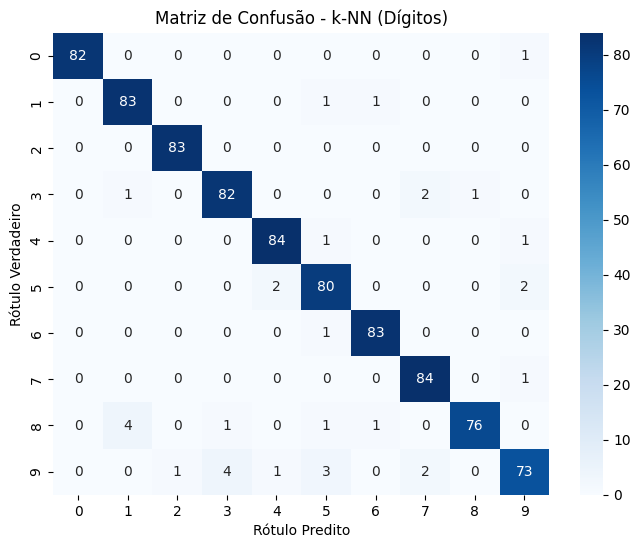

In [20]:

# TREINE E REPORTE A PERFORMANCE DO K-NN ---
print("\n[ETAPA 2.5] Treinando e avaliando o modelo k-NN final...")

X_final_train_dig_knn = np.concatenate((X_train_dig_temp, X_val_dig))
y_final_train_dig_knn = np.concatenate((y_train_dig_temp, y_val_dig))

knn_final_dig = KNeighborsClassifier(
    n_neighbors=best_knn_params_dig['k'],
    metric=best_knn_params_dig['metric']
)
knn_final_dig.fit(X_final_train_dig_knn, y_final_train_dig_knn)
print("Modelo k-NN final treinado.")

y_pred_knn_dig = knn_final_dig.predict(X_test_dig)
accuracy_knn_dig = accuracy_score(y_test_dig, y_pred_knn_dig)
print(f"\nAcurácia do k-NN no conjunto de Teste: {accuracy_knn_dig:.4f}")

print("Gerando Matriz de Confusão para o k-NN...")
cm_knn_dig = confusion_matrix(y_test_dig, y_pred_knn_dig)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_dig, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - k-NN (Dígitos)')
plt.xlabel('Rótulo Predito')
plt.ylabel('Rótulo Verdadeiro')
plt.show()


In [24]:

# COMPARAÇÃO FINAL
print("\n[ETAPA 2.6] Comparação Final - Dataset de Dígitos")
print(f"  - Acurácia Final Naive Bayes: {accuracy_nb_dig:.4f}")
print(f"  - Acurácia Final k-NN (Otimizado): {accuracy_knn_dig:.4f}")


[ETAPA 2.6] Comparação Final - Dataset de Dígitos
  - Acurácia Final Naive Bayes: 0.8968
  - Acurácia Final k-NN (Otimizado): 0.9609
